In [2]:
import numpy as np

data loading

In [4]:
x_train=np.load("x_train.npy")
y_train=np.load("y_train.npy")

In [6]:
x_val=np.load("x_val.npy")
y_val=np.load("y_val.npy")

In [8]:
y_train=y_train.astype("float32")

Model Training

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten
from tensorflow.keras.layers import Dense, Dropout, Reshape, Bidirectional, LSTM
from keras.callbacks import EarlyStopping, LearningRateScheduler

def scheduler(epoch, lr):
    if epoch > 2:
        return lr * 0.03  # Reduce learning rate by 10% after the 2nd epoch
    return lr


model = Sequential()

model.add(Input(shape=(224, 224, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Reshape((128, -1)))  

model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(32, return_sequences=False)))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_accuracy', patience=1, restore_best_weights=True)
lr_schedule = LearningRateScheduler(scheduler)
model.summary()

model.fit(
    x_train,
    y_train,
    epochs=10,  # Increased epochs for better learning, paired with early stopping
    batch_size=32,  # Kept the batch size as it is
    validation_data=(x_val, y_val),  # Adding validation data to monitor overfitting
    callbacks=[early_stop, lr_schedule],  # Added callbacks for early stopping and learning rate scheduling
    verbose=1  # To display the training process
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 128, 784)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 128, 128)            │         434,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 587,716 (2.24 MB)

 Trainable params: 587,268 (2.24 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 91s 532ms/step - accuracy: 0.8112 - loss: 0.4962 - val_accuracy: 0.2419 - val_loss: 4.4295 - learning_rate: 0.0010
Epoch 2/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 80s 517ms/step - accuracy: 0.9972 - loss: 0.0136 - val_accuracy: 0.5894 - val_loss: 1.7091 - learning_rate: 0.0010
Epoch 3/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 79s 516ms/step - accuracy: 0.9982 - loss: 0.0074 - val_accuracy: 0.8415 - val_loss: 0.5008 - learning_rate: 0.0010
Epoch 4/10
154/154 ━━━━━━━━━━━━━━━━━━━━ 80s 517ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0023 - learning_rate: 3.0000e-05
Epoch 5/10
 12/154 ━━━━━━━━━━━━━━━━━━━━ 1:18 554ms/step - accuracy: 1.0000 - loss: 0.0040

KeyboardInterrupt: 

In [18]:
x_test=np.load("x_test.npy")
y_test=np.load("y_test.npy")

model evaluation

In [20]:
model.evaluate(x_test,y_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 1.0000 - loss: 0.0024


[0.001588264130987227, 1.0]

In [62]:
# Replace x_train and y_train with validation/test data
y_true = y_train  # Ground truth labels for the test set
#y_pred_prob = model.predict(x_test)  # Predicted probabilities for the test set
print(y_pred_prob)
# Ensure y_true is one-hot encoded for multi-class evaluation
from sklearn.preprocessing import label_binarize
classes = [0,1,2,3]  # Extract unique classes from y_true
print(classes)
y_true_binarized = label_binarize(y_true, classes=classes)


[[9.7578109e-08 4.4887012e-05 4.7292333e-06 9.9995029e-01]
 [1.0717843e-07 4.6230474e-05 4.9647060e-06 9.9994862e-01]
 [1.5636775e-07 7.1543989e-05 7.0387700e-06 9.9992132e-01]
 ...
 [9.5435546e-08 4.3711902e-05 4.5538459e-06 9.9995160e-01]
 [9.1521139e-07 1.3944125e-05 9.9998391e-01 1.1995103e-06]
 [7.7765878e-07 1.3106283e-05 9.9998522e-01 8.5715919e-07]]
[0, 1, 2, 3]


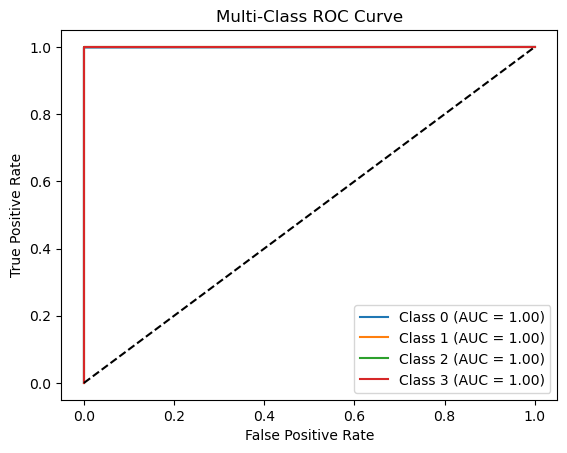

In [72]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Assuming y_true contains class indices (e.g., [0, 1, 2]) and y_pred_prob contains predicted probabilities
classes = [0,1,2,3]
y_true_binarized = label_binarize(y_true, classes=classes)  # One-hot encode y_true for multi-class
n_classes = len(classes)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='best')
plt.show()

In [44]:
import cv2## testing the video clip
from keras.preprocessing.image import img_to_array,load_img
from keras.models import load_model
import numpy as np
video_path = r"C:\Users\kumar\Documents\test.mp4"
vid = cv2.VideoCapture(video_path)
a=load_model(r"Deep_learning_3cat_adam.h5")
name=["Buglary","Normal","Shoplifiting","Vandalism"]

while(True):
    ret, frame = vid.read()
    frame=cv2.resize(frame,(224,224))
    array=img_to_array(frame)
    print(np.shape(array))
    array=array.reshape(1,224,224,3)
    xdata=np.array(array)
    xdata=xdata.astype("float32")
    xdata=xdata/255.0
    y=model.predict(xdata)

    text=name[np.argmax(y[0])]
    font = cv2.FONT_HERSHEY_SIMPLEX
    org = (50, 50)
    fontScale = 1
    color = (255, 0, 0)
    thickness = 2
    frame = cv2.putText(frame, text, org, font,fontScale, color, thickness, cv2.LINE_AA)
    cv2.imshow('frame', frame)
    print(text)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Shoplifiting
(224, 224, 3)
1/1 ━━━━━━━

In [42]:
model.save("BiLStm.h5")

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred=(model.predict(x_train)> 0.5).astype(int)
# Example
precision = precision_score(y_train, y_pred, average='macro')  # Change 'macro' to 'weighted' or 'micro' as needed
recall = recall_score(y_train, y_pred, average='macro')
f1 = f1_score(y_train, y_pred, average='macro')

print(f"Precision (Macro): {precision}")
print(f"Recall (Macro): {recall}")
print(f"F1 Score (Macro): {f1}")

154/154 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step
Precision (Macro): 1.0
Recall (Macro): 0.9995450409463148
F1 Score (Macro): 0.9997723132969034


In [74]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 112, 112, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 56, 56, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_3 (Reshape)                  │ (None, 128, 784)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_6 (Bidirectional)      │ (None, 128, 128)            │         434,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128, 128)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,762,254 (6.72 MB)

 Trainable params: 587,268 (2.24 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 1,174,538 (4.48 MB)

In [78]:
model.evaluate(x_train,y_train)

154/154 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9985 - loss: 0.0036


[0.001332730520516634, 0.9995933175086975]